In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from collections import Counter
sns.set()

In [2]:
data = pd.read_csv('../input/cascade-cup-22/train.csv')
metadata = pd.read_csv('../input/metadata/call_data.csv')
data.drop(index=420455, inplace=True) #Dropping one duplicate row and resetting indexes.
data.reset_index(drop=True, inplace=True)
data

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449994,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449995,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449996,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449997,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN


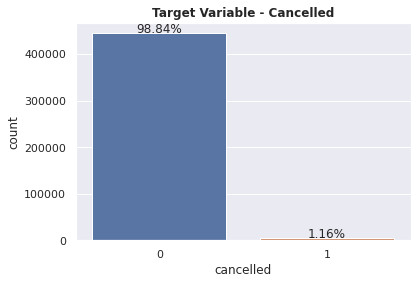

In [3]:
ax = sns.countplot(x = data['cancelled'])
plt.title('Target Variable - Cancelled', weight='bold')
sizes = []
total = len(data)
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x() + p.get_width()/2.0, height+600, '{:1.2f}%'.format(height/total*100), ha='center')

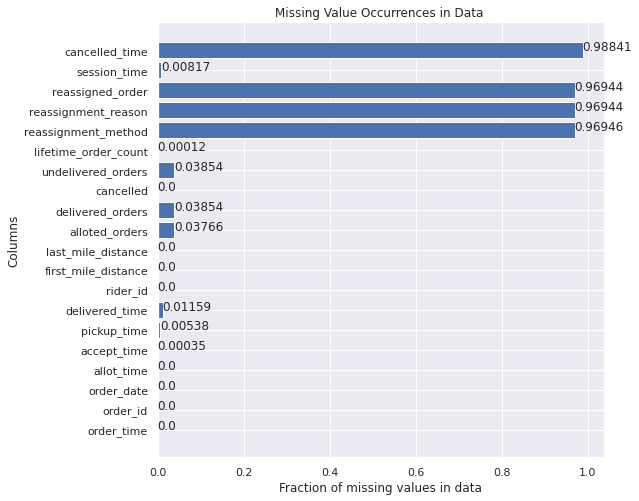

In [4]:
cols = [data.columns[i] for i in range(len(data.columns))]
missing = [data[col].isnull().sum() / len(data) for col in cols]
plt.figure(figsize=(8,8))
plt.barh(cols, missing)
plt.xlabel('Fraction of missing values in data')
plt.ylabel('Columns')
plt.title('Missing Value Occurrences in Data ')
for index, value in enumerate(missing):
    plt.text(value, index, str(round(value,5)))

In [5]:
def convert_to_datetime(datetime_str):
    #get time string in datetime format
    return datetime.fromisoformat(datetime_str)

def prepare_time_data(df):
    df['order_time'] = df['order_time'].apply(convert_to_datetime)
    df['allot_time'] = df['allot_time'].apply(convert_to_datetime)
    #Day of month: numerical
    df['order_DoM'] = df['order_time'].dt.day 
    #Month: nominal
    df['order_month'] = df['order_time'].dt.month
    #Hour: numerical
    df['order_hour'] = df['order_time'].dt.hour
    #Day of week: nominal
    df['order_DoW'] = df['order_time'].dt.weekday
    #Subtracting time to get delay bw order receipt and allotment to rider, in seconds
    df['allot_delay'] = df['allot_time'] - df['order_time']
    df['allot_delay'] = df['allot_delay']/timedelta(seconds=1)
    return df

data = prepare_time_data(data)

In [6]:
def encode_nan(df, cols):
    for col in cols:
        df[col+'_isnull'] = df[col]
        df[col+'_isnull'].fillna('NaN value', inplace=True)
        df.loc[df[col+'_isnull'] != 'NaN value', col+'_isnull'] = 'Not NaN value'
    return df

data = encode_nan(data, ['reassigned_order', 'reassignment_reason', 'reassignment_method'])

In [7]:
numerical = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'delivered_orders', 'undelivered_orders',
             'lifetime_order_count', 'session_time', 'order_DoM', 'order_hour']

categorical = ['order_DoW', 'order_month', 'reassigned_order', 'reassignment_reason', 'reassignment_method', 
               'reassigned_order_isnull', 'reassignment_reason_isnull', 'reassignment_method_isnull']

In [8]:
pos_data = data.loc[data['cancelled'] == 1]
neg_data = data.loc[data['cancelled'] == 0]

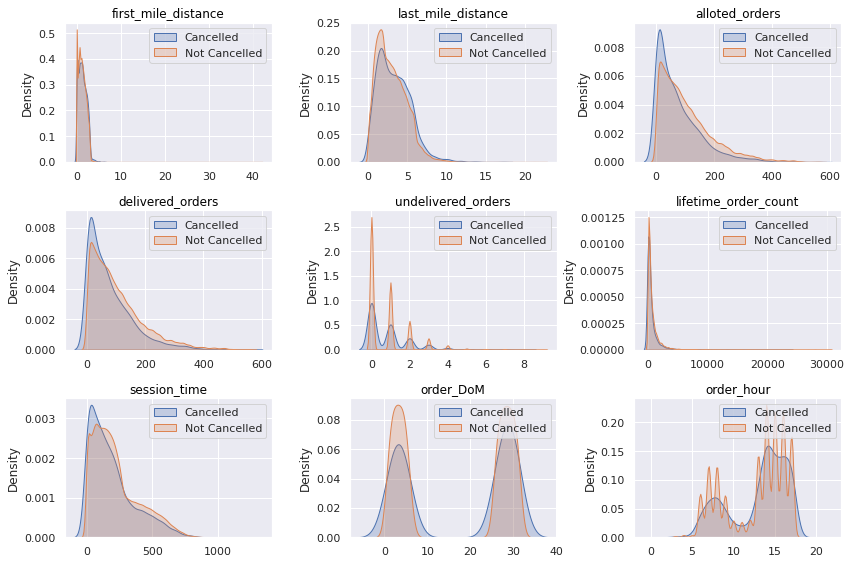

In [9]:
fig, ax = plt.subplots(3,3, figsize=(12,8))
for feat, subplot in zip(numerical, ax.flatten()):
    sns.kdeplot(data=pos_data, x=pos_data[feat], fill='red', ax=subplot, label='Cancelled')
    sns.kdeplot(data=neg_data, x=neg_data[feat], fill='red', ax=subplot, label='Not Cancelled')
    subplot.set_title(feat, color='black')
    subplot.set_xlabel('')
    subplot.legend()

fig.tight_layout()

<AxesSubplot:>

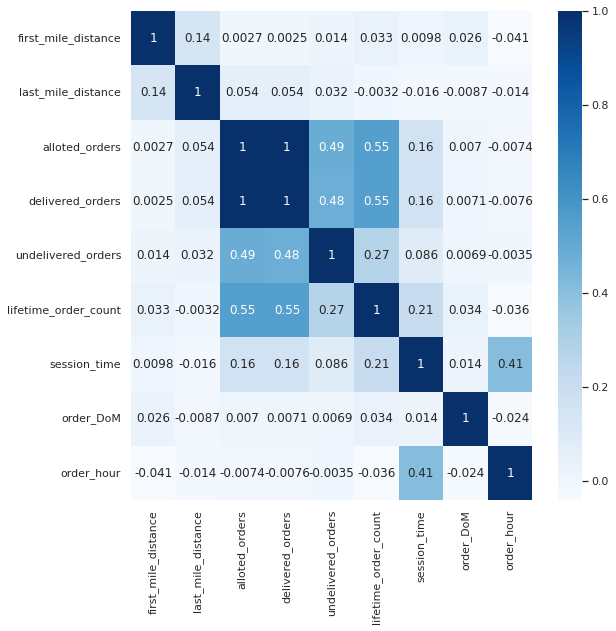

In [10]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data[numerical].corr(method='spearman'), annot=True, cmap='Blues', ax=ax)

<AxesSubplot:xlabel='alloted_orders', ylabel='delivered_orders'>

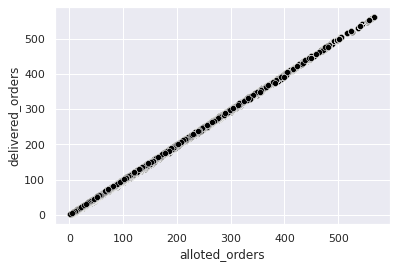

In [11]:
sns.scatterplot(data=data, x='alloted_orders', y='delivered_orders', color='black')

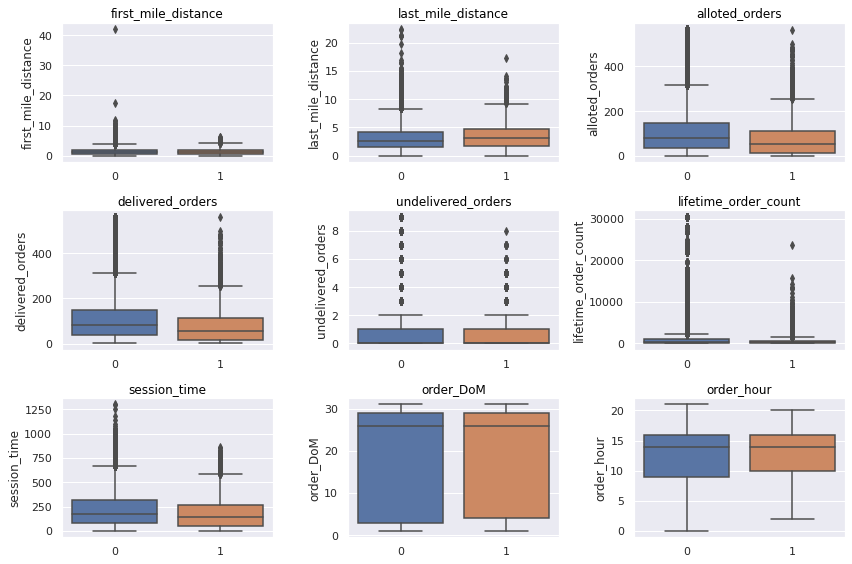

In [12]:
fig, ax = plt.subplots(3,3, figsize=(12,8))
for feat, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(data=data, x='cancelled', y=feat, ax=subplot)
    subplot.set_title(feat, color='black')
    subplot.set_xlabel('')

fig.tight_layout()

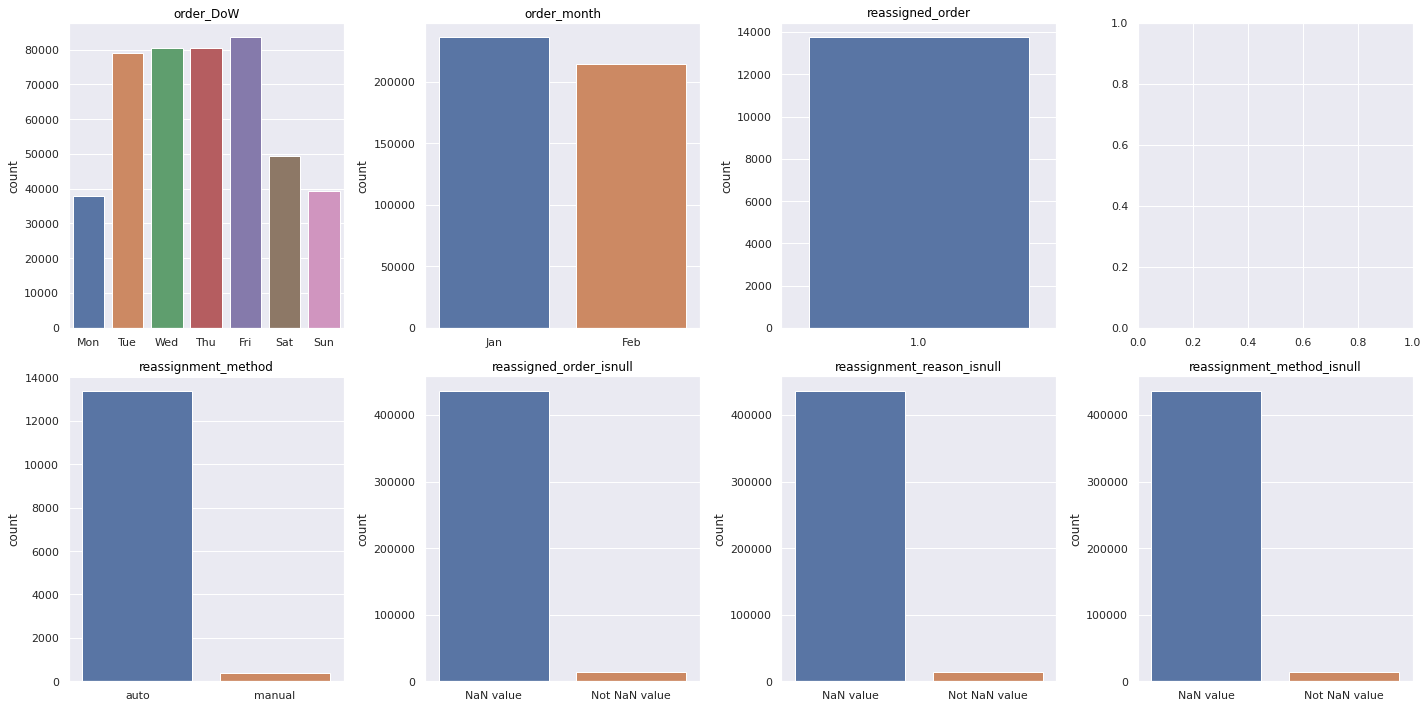

In [13]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
for feat, subplot in zip(categorical, ax.flatten()):
    if feat != 'reassignment_reason':
        sns.countplot(data=data, x=feat, ax=subplot)
        subplot.set_title(feat, color='black')
        subplot.set_xlabel('')
    if feat == 'order_DoW':
        labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
        subplot.set_xticks(np.arange(len(labels)))
        subplot.set_xticklabels(labels)
    elif feat == 'order_month':
        labels = ['Jan','Feb']
        subplot.set_xticks(np.arange(len(labels)))
        subplot.set_xticklabels(labels)

fig.tight_layout()

In [14]:
pd.crosstab(data.reassigned_order_isnull, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
reassigned_order_isnull,,
NaN value,431751,4496
Not NaN value,13031,721


In [15]:
pd.crosstab(data.reassignment_method_isnull, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
reassignment_method_isnull,,
NaN value,431757,4499
Not NaN value,13025,718


In [16]:
pd.crosstab(data.reassignment_reason_isnull, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
reassignment_reason_isnull,,
NaN value,431751,4496
Not NaN value,13031,721


In [17]:
pd.crosstab(data.reassignment_method, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
reassignment_method,,
auto,12698,684
manual,327,34


In [18]:
pd.crosstab(data.reassigned_order, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
reassigned_order,,
1.0,13031,721


In [19]:
pd.crosstab(data.order_month, data.cancelled).style.background_gradient(cmap='Blues')

cancelled,0,1
order_month,,
1,233035,2903
2,211747,2314


In [20]:
pd.crosstab(data.order_DoW, data.cancelled, margins=True).style.background_gradient(cmap='Blues')

cancelled,0,1,All
order_DoW,,,
0,37444,389,37833
1,78112,853,78965
2,79574,888,80462
3,79552,916,80468
4,82602,945,83547
5,48632,838,49470
6,38866,388,39254
All,444782,5217,449999


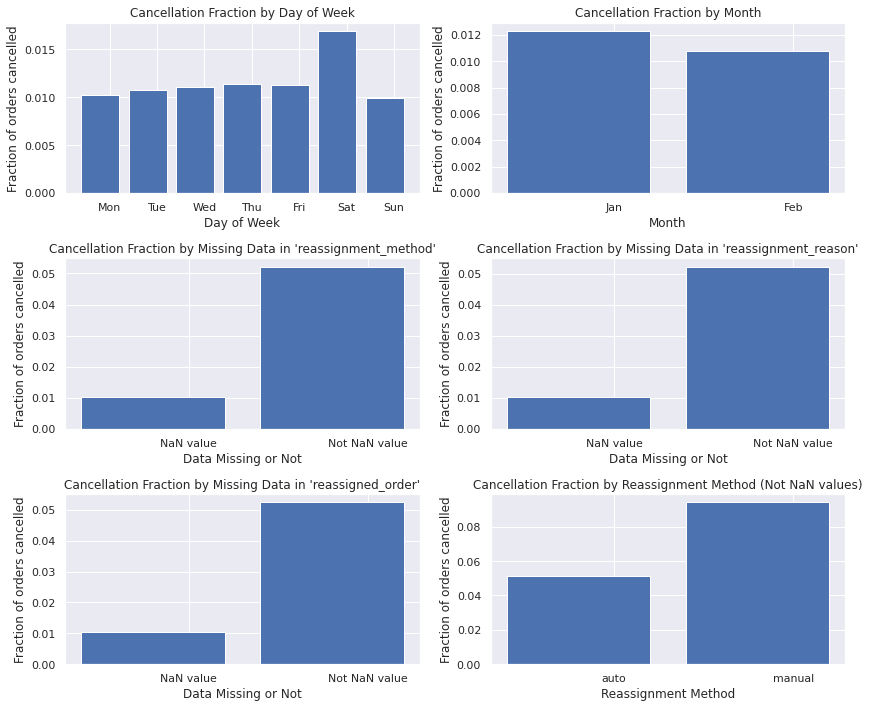

In [21]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
dow = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
not_cancelled = [data['cancelled'][data['order_DoW'] == day].value_counts()[0] for day in range(7)]
cancelled = [data['cancelled'][data['order_DoW'] == day].value_counts()[1] for day in range(7)]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(7)]
X_axis = np.arange(len(dow))
  
ax[0][0].bar(X_axis - 0.2, frac_cancelled)

ax[0][0].set_xticks(X_axis)
ax[0][0].set_xticklabels(dow)
ax[0][0].set_xlabel("Day of Week")
ax[0][0].set_ylabel("Fraction of orders cancelled")
ax[0][0].set_title("Cancellation Fraction by Day of Week")

month = ['Jan', 'Feb']
not_cancelled = [data['cancelled'][data['order_month'] == mon].value_counts()[0] for mon in [1,2]]
cancelled = [data['cancelled'][data['order_month'] == mon].value_counts()[1] for mon in [1,2]]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(2)]
X_axis = np.arange(len(month))
  
ax[0][1].bar(X_axis - 0.2, frac_cancelled)
ax[0][1].set_xticks(X_axis)
ax[0][1].set_xticklabels(month)
ax[0][1].set_xlabel("Month")
ax[0][1].set_ylabel("Fraction of orders cancelled")
ax[0][1].set_title("Cancellation Fraction by Month")

cat = ['NaN value', 'Not NaN value']
not_cancelled = [data['cancelled'][data['reassigned_order_isnull'] == val].value_counts()[0] for val in ['NaN value', 'Not NaN value']]
cancelled = [data['cancelled'][data['reassigned_order_isnull'] == val].value_counts()[1] for val in ['NaN value', 'Not NaN value']]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(2)]
X_axis = np.arange(len(cat))
ax[2][0].bar(X_axis-0.2, frac_cancelled)
ax[2][0].set_xticks(X_axis)
ax[2][0].set_xticklabels(cat)
ax[2][0].set_xlabel("Data Missing or Not")
ax[2][0].set_ylabel("Fraction of orders cancelled")
ax[2][0].set_title("Cancellation Fraction by Missing Data in 'reassigned_order'")

not_cancelled = [data['cancelled'][data['reassignment_method_isnull'] == val].value_counts()[0] for val in ['NaN value', 'Not NaN value']]
cancelled = [data['cancelled'][data['reassignment_method_isnull'] == val].value_counts()[1] for val in ['NaN value', 'Not NaN value']]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(2)]
X_axis = np.arange(len(cat))
ax[1][0].bar(X_axis-0.2, frac_cancelled)
ax[1][0].set_xticks(X_axis)
ax[1][0].set_xticklabels(cat)
ax[1][0].set_xlabel("Data Missing or Not")
ax[1][0].set_ylabel("Fraction of orders cancelled")
ax[1][0].set_title("Cancellation Fraction by Missing Data in 'reassignment_method'")

not_cancelled = [data['cancelled'][data['reassignment_reason_isnull'] == val].value_counts()[0] for val in ['NaN value', 'Not NaN value']]
cancelled = [data['cancelled'][data['reassignment_reason_isnull'] == val].value_counts()[1] for val in ['NaN value', 'Not NaN value']]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(2)]
X_axis = np.arange(len(cat))
ax[1][1].bar(X_axis-0.2, frac_cancelled)
ax[1][1].set_xticks(X_axis)
ax[1][1].set_xticklabels(cat)
ax[1][1].set_xlabel("Data Missing or Not")
ax[1][1].set_ylabel("Fraction of orders cancelled")
ax[1][1].set_title("Cancellation Fraction by Missing Data in 'reassignment_reason'")

cat = ['auto', 'manual']
not_cancelled = [data['cancelled'][data['reassignment_method'] == val].value_counts()[0] for val in cat]
cancelled = [data['cancelled'][data['reassignment_method'] == val].value_counts()[1] for val in cat]
frac_cancelled = [cancelled[i] / (not_cancelled[i]+cancelled[i]) for i in range(2)]
X_axis = np.arange(len(cat))
ax[2][1].bar(X_axis-0.2, frac_cancelled)
ax[2][1].set_xticks(X_axis)
ax[2][1].set_xticklabels(cat)
ax[2][1].set_xlabel("Reassignment Method")
ax[2][1].set_ylabel("Fraction of orders cancelled")
ax[2][1].set_title("Cancellation Fraction by Reassignment Method (Not NaN values)")

fig.tight_layout()

538.9 0.0
15.5 0.03333333333333333
5165.283333333334 0.06666666666666667
10009.016666666666 0.05


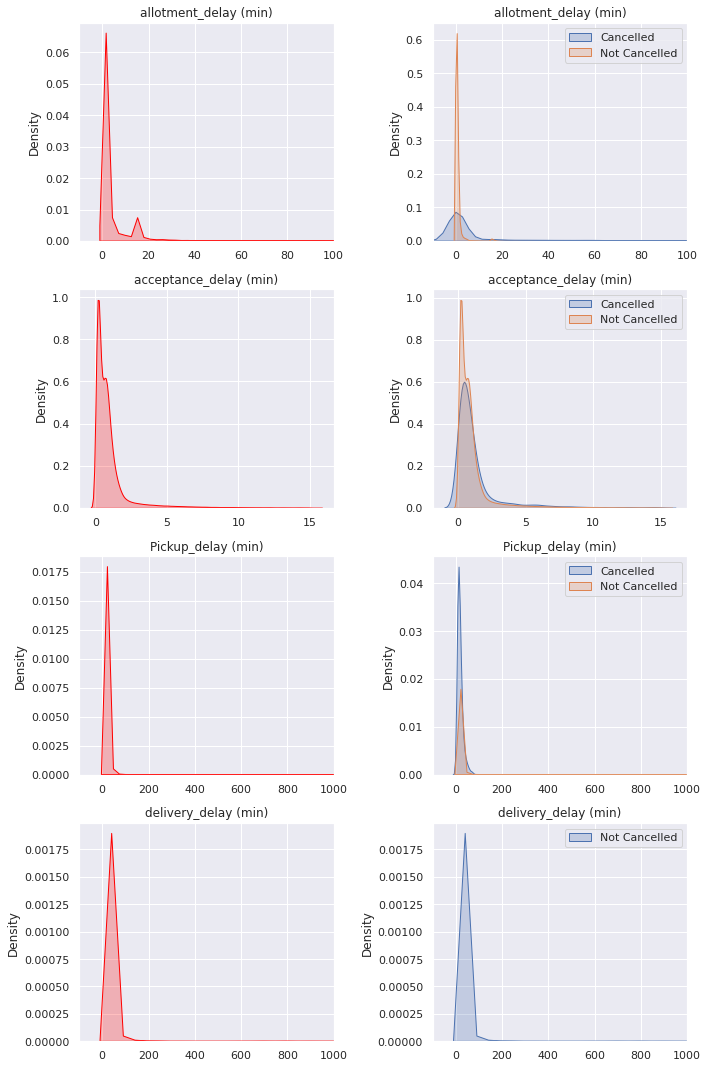

In [22]:
times = ['order_time', 'allot_time', 'accept_time',	'pickup_time',	'delivered_time']
fig, ax = plt.subplots(4,2, figsize=(10,15))
for i in range(len(times)-1):
    temp = pd.DataFrame()
    temp[times[i]] = data[times[i]]
    temp[times[i+1]] = data[times[i+1]]
    temp['cancelled'] = data['cancelled']
    temp.dropna(inplace=True)
    if i>1:
        temp[times[i]] = temp[times[i]].apply(convert_to_datetime)
    if i>0:
        temp[times[i+1]] = temp[times[i+1]].apply(convert_to_datetime)
    if i==0:
        temp['allotment_delay'] = temp[times[i+1]] - temp[times[i]]
        temp['allotment_delay'] = temp['allotment_delay']/timedelta(minutes=1)
        temp = temp[temp['allotment_delay'] >= 0]
        print(max(temp['allotment_delay']), min(temp['allotment_delay']))
        sns.kdeplot(data=temp, x=temp['allotment_delay'], fill='red', color='red', ax=ax[i][0])
        temp_pos = temp[temp['cancelled'] == 1]
        temp_neg = temp[temp['cancelled'] == 0]
        sns.kdeplot(data=temp_pos, x=temp_pos['allotment_delay'], ax=ax[i][1], label='Cancelled',  fill='green')
        sns.kdeplot(data=temp_neg, x=temp_neg['allotment_delay'], ax=ax[i][1], label='Not Cancelled',  fill='green')
        ax[i][1].legend()
        ax[i][1].set_xlim(-10,100)
        ax[i][1].set_title('allotment_delay (min)')
        ax[i][1].set_xlabel('')
        ax[i][0].set_xlim(-10,100)
        ax[i][0].set_title('allotment_delay (min)')
        ax[i][0].set_xlabel('')
    

    elif i==1:
        temp['acceptance_delay'] = temp[times[i+1]] - temp[times[i]]
        temp['acceptance_delay'] = temp['acceptance_delay']/timedelta(minutes=1)
        temp = temp[temp['acceptance_delay'] >= 0]
        print(max(temp['acceptance_delay']), min(temp['acceptance_delay']))
        sns.kdeplot(data=temp, x=temp['acceptance_delay'], fill='red', color='red', ax=ax[i][0])
        temp_pos = temp[temp['cancelled'] == 1]
        temp_neg = temp[temp['cancelled'] == 0]
        sns.kdeplot(data=temp_pos, x=temp_pos['acceptance_delay'], ax=ax[i][1], label='Cancelled',  fill='green')
        sns.kdeplot(data=temp_neg, x=temp_neg['acceptance_delay'], ax=ax[i][1], label='Not Cancelled',  fill='green')
        ax[i][1].legend()
        ax[i][1].set_title('acceptance_delay (min)')
        ax[i][1].set_xlabel('')
        ax[i][0].set_title('acceptance_delay (min)')
        ax[i][0].set_xlabel('')

    elif i==2:
        temp['Pickup_delay'] = temp[times[i+1]] - temp[times[i]]
        temp['Pickup_delay'] = temp['Pickup_delay']/timedelta(minutes=1)
        temp = temp[temp['Pickup_delay'] >= 0]
        print(max(temp['Pickup_delay']), min(temp['Pickup_delay']))
        sns.kdeplot(data=temp, x=temp['Pickup_delay'], fill='red', color='red', ax=ax[i][0])
        temp_pos = temp[temp['cancelled'] == 1]
        temp_neg = temp[temp['cancelled'] == 0]
        sns.kdeplot(data=temp_pos, x=temp_pos['Pickup_delay'], ax=ax[i][1], label='Cancelled',  fill='green')
        sns.kdeplot(data=temp_neg, x=temp_neg['Pickup_delay'], ax=ax[i][1], label='Not Cancelled',  fill='green')
        ax[i][1].legend()
        ax[i][1].set_xlim(-100,1000)
        ax[i][1].set_title('Pickup_delay (min)')
        ax[i][1].set_xlabel('')
        ax[i][0].set_xlim(-100,1000)
        ax[i][0].set_title('Pickup_delay (min)')
        ax[i][0].set_xlabel('')

    elif i==3:
        temp['delivery_delay'] = temp[times[i+1]] - temp[times[i]]
        temp['delivery_delay'] = temp['delivery_delay']/timedelta(minutes=1)
        temp = temp[temp['delivery_delay'] >= 0]
        print(max(temp['delivery_delay']), min(temp['delivery_delay']))
        sns.kdeplot(data=temp, x=temp['delivery_delay'], fill='red', color='red', ax=ax[i][0])
        temp_pos = temp[temp['cancelled'] == 1]
        temp_neg = temp[temp['cancelled'] == 0]
        sns.kdeplot(data=temp_pos, x=temp_pos['delivery_delay'], ax=ax[i][1], label='Cancelled', fill='green')
        sns.kdeplot(data=temp_neg, x=temp_neg['delivery_delay'], ax=ax[i][1], label='Not Cancelled',  fill='green')
        ax[i][1].legend()
        ax[i][1].set_xlim(-100,1000)
        ax[i][1].set_title('delivery_delay (min)')
        ax[i][1].set_xlabel('')
        ax[i][0].set_xlim(-100,1000)
        ax[i][0].set_title('delivery_delay (min)')
        ax[i][0].set_xlabel('')

fig.tight_layout()

Text(0.5, 0, '')

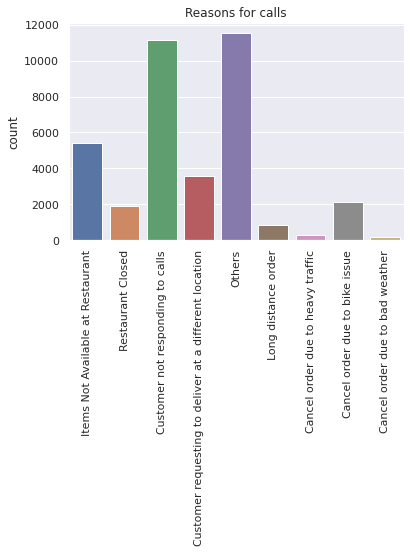

In [23]:
ax = sns.countplot(x=metadata['reason_text'])
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set_title('Reasons for calls')
ax.set_xlabel('')

Text(0.5, 0, '')

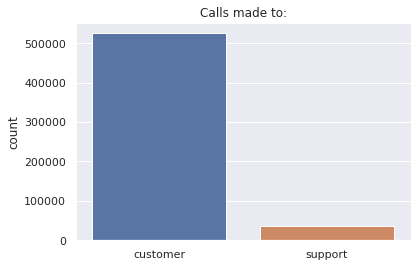

In [24]:
ax = sns.countplot(x=metadata['user_type'])
ax.set_title('Calls made to:')
ax.set_xlabel('')

In [25]:
pd.crosstab(metadata.user_type, metadata.reason_text, margins=True).style.background_gradient(cmap='Blues')

reason_text,Cancel order due to bad weather,Cancel order due to bike issue,Cancel order due to heavy traffic,Customer not responding to calls,Customer requesting to deliver at a different location,Items Not Available at Restaurant,Long distance order,Others,Restaurant Closed,All
user_type,,,,,,,,,,
support,150,2154,286,11178,3574,5439,841,11536,1903,37061
All,150,2154,286,11178,3574,5439,841,11536,1903,37061


In [26]:
df = pd.merge(data, metadata, how='left', left_on=['order_id'], right_on=['order_id'])
order_counts = Counter(df['order_id'])
temp = pd.DataFrame()
temp['order_id'] = order_counts.keys()
temp['No. of Recorded Calls'] = order_counts.values()
temp['cancelled'] = data['cancelled']
temp

,order_id,No. of Recorded Calls,cancelled
0,556753,2,0
1,556754,1,0
2,556755,2,0
3,556756,1,0
4,556757,1,0
...,...,...,...
449994,130226,3,0
449995,130227,1,0
449996,130228,1,0
449997,130229,1,0


Text(0.5, 1.0, 'Trend of No. of calls recorded with order cancellation')

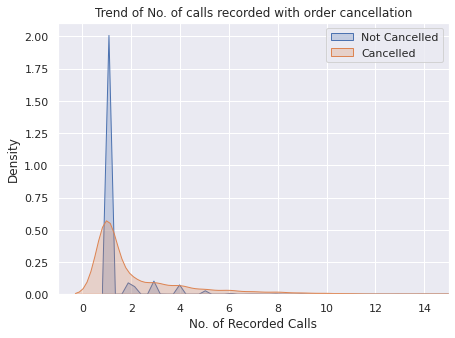

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.kdeplot(data=temp, x=temp['No. of Recorded Calls'][temp['cancelled'] == 0], fill='green', ax=ax, label='Not Cancelled')
sns.kdeplot(data=temp, x=temp['No. of Recorded Calls'][temp['cancelled'] == 1], fill='green', ax=ax, label='Cancelled')
ax.legend()
ax.set_xlim(-1,15)
ax.set_title('Trend of No. of calls recorded with order cancellation')